In [7]:
# Import cac thu vien can thiet

import numpy as np
import glob
import cv2
from sklearn.model_selection import train_test_split
from skimage.feature import hog 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
# Tao khong gian Luu anh

X = []
Y = []
X_train = []
X_test = []
Y_train = []
Y_test = []

In [9]:
# doc du lieu bo du lieu so 4
#X_train=np.loadtxt(r'...\ARDIS_DATASET_IV\ARDIS_train_2828.csv', dtype='float')
#X_test=np.loadtxt(r'...\ARDIS_DATASET_IV\ARDIS_test_2828.csv', dtype='float')
#Y_train=np.loadtxt(r'...\ARDIS_DATASET_IV\ARDIS_train_labels.csv', dtype='float')
#Y_test=np.loadtxt(r'...\ARDIS_DATASET_IV\ARDIS_test_labels.csv', dtype='float')
# Reshape X
#X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float64')
#X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float64')

In [10]:
# chuyen du lieu dau ra ve dang so de phu
# Transform Y
#def transform(Y):
#    Y_temp = []
#    for i in Y:
#        for j in range(10):
#            if i[j] == 1:
#                Y_temp.append(j)
#    Y_temp = np.array(Y_temp)
#    return Y_temp
#Y_train = transform(Y_train)
#Y_test = transform(Y_test)

# Chuyen X sang dang mang
#X_train = np.array(X_train)
#X_test = np.array(X_test)

In [11]:
# Doc anh, chia du lieu Train va Test cho bo so 2 hoac 3

for i in range(10):
    for j in glob.glob(r'...\ARDIS_DATASET_III' + '\\'+ str(i)+'\*'):
        img = cv2.imread(j) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
        img = cv2.resize(img,(28, 28)) 
        X.append(img)
        Y.append(i)
    X_train_temp, X_test_temp, Y_train_temp, Y_test_temp = train_test_split(X, Y, train_size = 66/76, random_state = 0)
    X_train = X_train + X_train_temp
    X_test = X_test + X_test_temp
    Y_train = Y_train + Y_train_temp
    Y_test = Y_test + Y_test_temp
    del X[:]
    del Y[:]


In [12]:
# Ham HOG
    
def HOG(X):
    X_temp = []
    for i in range(len(X)):
        img = hog(X[i], orientations = 8, pixels_per_cell = (4, 4), cells_per_block = (1,1))
        X_temp.append(img)
    return X_temp    

X_train = HOG(X_train)
X_test = HOG(X_test)

In [13]:
# Chuyen ve dang mang

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)


In [14]:
# Chuan hoa du lieu

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [15]:
# Giam chieu su dung PCA

pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
#Su dung thuat toan KNN

#model = KNeighborsClassifier()
#model.fit(X_train, Y_train)

In [17]:
# Su dung thuat toan Logistic Regression
#model = LogisticRegression()
#model.fit(X_train, Y_train)

In [18]:
# Su dung thuat toan SVM

model = SVC(random_state = 0)
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Confusion Matrix TRAIN: 


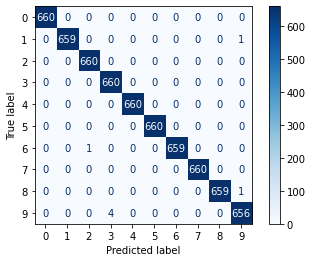

In [19]:
# Confusion matrix cua tap Train

print("Confusion Matrix TRAIN: ")
plt.show(plot_confusion_matrix(model, X_train, Y_train,cmap = 'Blues', values_format = 'g'))

In [20]:
# He so accuracy tren tap Train

print("Accuracy Score TRAIN: ", accuracy_score(Y_train, model.predict(X_train)))

Accuracy Score TRAIN:  0.9989393939393939


Confusion Matrix TEST: 


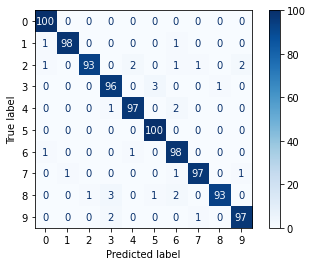

In [21]:
# Confusion matrix cua tap Test

print("Confusion Matrix TEST: ")
plt.show(plot_confusion_matrix(model, X_test, Y_test,cmap = 'Blues', values_format = 'g'))

In [22]:
# He so accuracy tren tap Test

print("Accuracy Score TEST: ", accuracy_score(Y_test, model.predict(X_test)))

Accuracy Score TEST:  0.969
